In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])# Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

### The  values were created using the equation of a line . This way, we know what the model parameters to be learned are, say,  and . Random, normally-distributed noise has been added to simulate sampling error: m =-0.5 and b = 2.

In [58]:
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)
# y

In [59]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])# Patient's "forgetfulness score
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

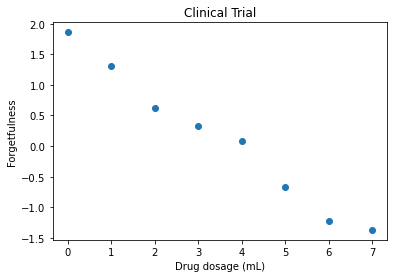

In [60]:
fig, ax = plt.subplots()
plt.title('Clinical Trial')
plt.xlabel('Drug dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

In [61]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [62]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [63]:
def regression(my_x, my_m, my_b): # y = mx + b
    return my_m*my_x + my_b

In [64]:
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    
    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item() # fit x and y with line
    y_max = regression(x_max, my_m, my_b).detach().item() # //  //   //    //
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

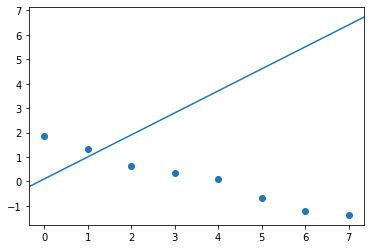

In [65]:
regression_plot(x, y, m, b)

# Machin Learning

### step 1 :  Forward pass

In [66]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

### Step 2: Compare yhat with true to calculate cost C


##### There is a PyTorch MSELoss method, but let's define it outselves to see how it works. MSE cost is defined by:


In [67]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [68]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

# Step 3: Use autodiff to calculate gradiant of C w.r.t parametrs
Cost function

In [69]:
C.backward()

In [70]:
m.grad

tensor([36.3050])

In [71]:
b.grad

tensor([6.2650])

### Step 4: Gradient descent

In [72]:
optimizer = torch.optim.SGD([m, b], lr=0.01) 

In [73]:
optimizer.step()

###### Confirm parameters have been adjusted sensibly:

In [74]:
m

tensor([0.5369], requires_grad=True)

In [75]:
b

tensor([0.0374], requires_grad=True)

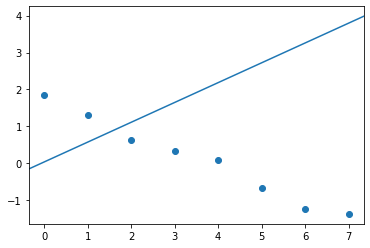

In [76]:
regression_plot(x, y, m, b)



### We can repeat steps 1 and 2 to confirm cost has decreased:

In [77]:
# C = g(f(x, m, b), y) This formula
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

#### Put the 4 steps in a loop to iteratively minimize cost toward zero:

In [78]:
epochs = 1000
for epoch in range(epochs):
    
    optimizer.zero_grad() # Rest gradients to zero; else they accumulate
    
    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2
    
    C.backward() # Step 3
    optimizer.step() # Step 4
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))
    
    

Epoch 0, cost 8.57, m grad 23.2, b grad 3.6
Epoch 1, cost 4.08, m grad 14.8, b grad 1.91
Epoch 2, cost 2.25, m grad 9.49, b grad 0.831
Epoch 3, cost 1.51, m grad 6.11, b grad 0.15
Epoch 4, cost 1.2, m grad 3.96, b grad -0.28
Epoch 5, cost 1.07, m grad 2.59, b grad -0.552
Epoch 6, cost 1.01, m grad 1.72, b grad -0.723
Epoch 7, cost 0.981, m grad 1.17, b grad -0.829
Epoch 8, cost 0.962, m grad 0.82, b grad -0.894
Epoch 9, cost 0.948, m grad 0.595, b grad -0.934
Epoch 10, cost 0.936, m grad 0.452, b grad -0.957
Epoch 11, cost 0.925, m grad 0.361, b grad -0.969
Epoch 12, cost 0.915, m grad 0.302, b grad -0.975
Epoch 13, cost 0.904, m grad 0.265, b grad -0.977
Epoch 14, cost 0.894, m grad 0.241, b grad -0.976
Epoch 15, cost 0.884, m grad 0.225, b grad -0.973
Epoch 16, cost 0.874, m grad 0.214, b grad -0.969
Epoch 17, cost 0.864, m grad 0.207, b grad -0.965
Epoch 18, cost 0.854, m grad 0.202, b grad -0.96
Epoch 19, cost 0.845, m grad 0.199, b grad -0.955
Epoch 20, cost 0.835, m grad 0.196, b

Epoch 178, cost 0.151, m grad 0.0775, b grad -0.381
Epoch 179, cost 0.149, m grad 0.0771, b grad -0.379
Epoch 180, cost 0.148, m grad 0.0766, b grad -0.377
Epoch 181, cost 0.146, m grad 0.0762, b grad -0.375
Epoch 182, cost 0.145, m grad 0.0758, b grad -0.373
Epoch 183, cost 0.143, m grad 0.0753, b grad -0.37
Epoch 184, cost 0.142, m grad 0.0749, b grad -0.368
Epoch 185, cost 0.141, m grad 0.0744, b grad -0.366
Epoch 186, cost 0.139, m grad 0.074, b grad -0.364
Epoch 187, cost 0.138, m grad 0.0736, b grad -0.362
Epoch 188, cost 0.136, m grad 0.0732, b grad -0.36
Epoch 189, cost 0.135, m grad 0.0727, b grad -0.358
Epoch 190, cost 0.134, m grad 0.0723, b grad -0.356
Epoch 191, cost 0.132, m grad 0.0719, b grad -0.354
Epoch 192, cost 0.131, m grad 0.0715, b grad -0.352
Epoch 193, cost 0.13, m grad 0.0711, b grad -0.35
Epoch 194, cost 0.129, m grad 0.0707, b grad -0.348
Epoch 195, cost 0.127, m grad 0.0703, b grad -0.346
Epoch 196, cost 0.126, m grad 0.0699, b grad -0.344
Epoch 197, cost 0

Epoch 361, cost 0.0353, m grad 0.0269, b grad -0.132
Epoch 362, cost 0.0351, m grad 0.0268, b grad -0.132
Epoch 363, cost 0.0349, m grad 0.0266, b grad -0.131
Epoch 364, cost 0.0347, m grad 0.0264, b grad -0.13
Epoch 365, cost 0.0346, m grad 0.0263, b grad -0.129
Epoch 366, cost 0.0344, m grad 0.0261, b grad -0.129
Epoch 367, cost 0.0342, m grad 0.026, b grad -0.128
Epoch 368, cost 0.034, m grad 0.0258, b grad -0.127
Epoch 369, cost 0.0339, m grad 0.0257, b grad -0.126
Epoch 370, cost 0.0337, m grad 0.0255, b grad -0.126
Epoch 371, cost 0.0336, m grad 0.0254, b grad -0.125
Epoch 372, cost 0.0334, m grad 0.0253, b grad -0.124
Epoch 373, cost 0.0332, m grad 0.0251, b grad -0.123
Epoch 374, cost 0.0331, m grad 0.025, b grad -0.123
Epoch 375, cost 0.0329, m grad 0.0248, b grad -0.122
Epoch 376, cost 0.0328, m grad 0.0247, b grad -0.121
Epoch 377, cost 0.0326, m grad 0.0245, b grad -0.121
Epoch 378, cost 0.0325, m grad 0.0244, b grad -0.12
Epoch 379, cost 0.0323, m grad 0.0242, b grad -0.11

Epoch 565, cost 0.021, m grad 0.00827, b grad -0.0407
Epoch 566, cost 0.0209, m grad 0.00822, b grad -0.0404
Epoch 567, cost 0.0209, m grad 0.00818, b grad -0.0402
Epoch 568, cost 0.0209, m grad 0.00813, b grad -0.04
Epoch 569, cost 0.0209, m grad 0.00808, b grad -0.0397
Epoch 570, cost 0.0209, m grad 0.00804, b grad -0.0395
Epoch 571, cost 0.0209, m grad 0.00799, b grad -0.0393
Epoch 572, cost 0.0208, m grad 0.00794, b grad -0.0391
Epoch 573, cost 0.0208, m grad 0.0079, b grad -0.0388
Epoch 574, cost 0.0208, m grad 0.00785, b grad -0.0386
Epoch 575, cost 0.0208, m grad 0.00781, b grad -0.0384
Epoch 576, cost 0.0208, m grad 0.00776, b grad -0.0382
Epoch 577, cost 0.0208, m grad 0.00772, b grad -0.038
Epoch 578, cost 0.0208, m grad 0.00767, b grad -0.0377
Epoch 579, cost 0.0207, m grad 0.00763, b grad -0.0375
Epoch 580, cost 0.0207, m grad 0.00758, b grad -0.0373
Epoch 581, cost 0.0207, m grad 0.00754, b grad -0.0371
Epoch 582, cost 0.0207, m grad 0.0075, b grad -0.0369
Epoch 583, cost 

Epoch 735, cost 0.0197, m grad 0.0031, b grad -0.0152
Epoch 736, cost 0.0197, m grad 0.00308, b grad -0.0151
Epoch 737, cost 0.0197, m grad 0.00306, b grad -0.015
Epoch 738, cost 0.0197, m grad 0.00304, b grad -0.015
Epoch 739, cost 0.0197, m grad 0.00302, b grad -0.0149
Epoch 740, cost 0.0197, m grad 0.00301, b grad -0.0148
Epoch 741, cost 0.0197, m grad 0.00299, b grad -0.0147
Epoch 742, cost 0.0197, m grad 0.00297, b grad -0.0146
Epoch 743, cost 0.0197, m grad 0.00296, b grad -0.0145
Epoch 744, cost 0.0197, m grad 0.00294, b grad -0.0145
Epoch 745, cost 0.0197, m grad 0.00292, b grad -0.0144
Epoch 746, cost 0.0197, m grad 0.0029, b grad -0.0143
Epoch 747, cost 0.0196, m grad 0.00289, b grad -0.0142
Epoch 748, cost 0.0196, m grad 0.00287, b grad -0.0141
Epoch 749, cost 0.0196, m grad 0.00285, b grad -0.014
Epoch 750, cost 0.0196, m grad 0.00284, b grad -0.014
Epoch 751, cost 0.0196, m grad 0.00282, b grad -0.0139
Epoch 752, cost 0.0196, m grad 0.00281, b grad -0.0138
Epoch 753, cost 

Epoch 929, cost 0.0195, m grad 0.00101, b grad -0.00496
Epoch 930, cost 0.0195, m grad 0.001, b grad -0.00493
Epoch 931, cost 0.0195, m grad 0.000997, b grad -0.0049
Epoch 932, cost 0.0195, m grad 0.000991, b grad -0.00487
Epoch 933, cost 0.0195, m grad 0.000986, b grad -0.00484
Epoch 934, cost 0.0195, m grad 0.000979, b grad -0.00482
Epoch 935, cost 0.0195, m grad 0.000973, b grad -0.00479
Epoch 936, cost 0.0195, m grad 0.000968, b grad -0.00476
Epoch 937, cost 0.0195, m grad 0.000962, b grad -0.00473
Epoch 938, cost 0.0195, m grad 0.000956, b grad -0.00471
Epoch 939, cost 0.0195, m grad 0.000951, b grad -0.00468
Epoch 940, cost 0.0195, m grad 0.000946, b grad -0.00465
Epoch 941, cost 0.0195, m grad 0.000941, b grad -0.00463
Epoch 942, cost 0.0195, m grad 0.000935, b grad -0.0046
Epoch 943, cost 0.0195, m grad 0.00093, b grad -0.00457
Epoch 944, cost 0.0195, m grad 0.000925, b grad -0.00455
Epoch 945, cost 0.0195, m grad 0.000919, b grad -0.00452
Epoch 946, cost 0.0195, m grad 0.00091

In [79]:
m.item()

-0.4681258499622345

In [80]:
b.item()

1.7542961835861206

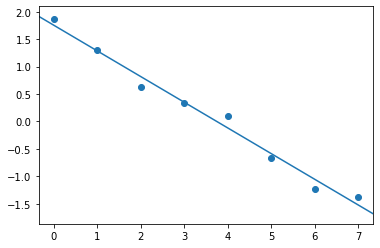

In [81]:
regression_plot(x, y, m, b)

In [ ]:
The model doesn't perfectly approximate the slope (-0.5) and -intercept (2.0) used to simulate the outcomes  at the top of this notebook. This reflects the imperfectness of the sample of eight data points due to adding random noise during the simulation step. In the real world, the best solution would be to sample additional data points: The more data we sample, the more accurate our estimates of the true underlying parameters will be.

# Exercises

### y = x^2 + 2x + 2 where x = 2.


In [82]:
x = torch.tensor([2])
x

tensor([2])

In [84]:
y = x**2 + 2*x + 2
y

tensor([10])

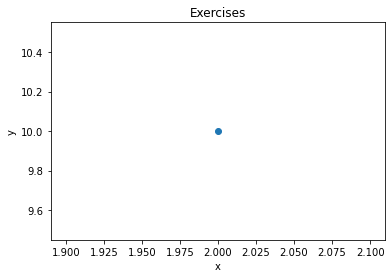

In [87]:
fig, ax = plt.subplots()
plt.title('Exercises')
plt.xlabel('x')
plt.ylabel('y')
_ = ax.scatter(x, y)

In [89]:
m = torch.tensor([0.5]).requires_grad_()

In [90]:
b = torch.tensor([0.3]).requires_grad_()


In [92]:
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

In [93]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

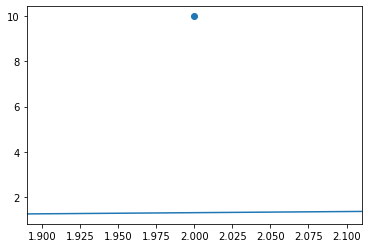

In [94]:
regression_plot(x, y, m, b)

In [95]:
# step 1:
yhat = regression(x, m, b)
yhat

tensor([1.3000], grad_fn=<AddBackward0>)

In [96]:
# step 2:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y) ** 2)
    return sigma / len(my_y)

In [97]:
C = mse(yhat, y)
C

tensor(75.6900, grad_fn=<DivBackward0>)

In [98]:
# step 3:
C.backward()

In [99]:
m.grad

tensor([-34.8000])

In [100]:
b.grad

tensor([-17.4000])

In [103]:
# step 4 :
optimizer = torch.optim.SGD([m,b], lr = 0.01)


In [104]:
optimizer.step()

In [105]:
m

tensor([0.8480], requires_grad=True)

In [106]:
b

tensor([0.4740], requires_grad=True)

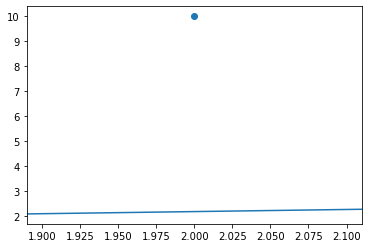

In [107]:
regression_plot(x, y, m, b)

In [108]:
C = mse(regression(x, m, b), y)
C

tensor(61.3089, grad_fn=<DivBackward0>)

In [109]:
epochs = 1000
for epoch in range(epochs):
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2
    
    C.backward() # Step 3
    optimizer.step() # Step 4
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 61.3, m grad -31.3, b grad -15.7
Epoch 1, cost 49.7, m grad -28.2, b grad -14.1
Epoch 2, cost 40.2, m grad -25.4, b grad -12.7
Epoch 3, cost 32.6, m grad -22.8, b grad -11.4
Epoch 4, cost 26.4, m grad -20.5, b grad -10.3
Epoch 5, cost 21.4, m grad -18.5, b grad -9.25
Epoch 6, cost 17.3, m grad -16.6, b grad -8.32
Epoch 7, cost 14, m grad -15, b grad -7.49
Epoch 8, cost 11.4, m grad -13.5, b grad -6.74
Epoch 9, cost 9.2, m grad -12.1, b grad -6.07
Epoch 10, cost 7.45, m grad -10.9, b grad -5.46
Epoch 11, cost 6.04, m grad -9.83, b grad -4.91
Epoch 12, cost 4.89, m grad -8.85, b grad -4.42
Epoch 13, cost 3.96, m grad -7.96, b grad -3.98
Epoch 14, cost 3.21, m grad -7.17, b grad -3.58
Epoch 15, cost 2.6, m grad -6.45, b grad -3.22
Epoch 16, cost 2.11, m grad -5.8, b grad -2.9
Epoch 17, cost 1.71, m grad -5.22, b grad -2.61
Epoch 18, cost 1.38, m grad -4.7, b grad -2.35
Epoch 19, cost 1.12, m grad -4.23, b grad -2.12
Epoch 20, cost 0.906, m grad -3.81, b grad -1.9
Epoch 21, c

Epoch 165, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 166, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 167, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 168, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 169, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 170, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 171, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 172, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 173, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 174, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 175, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 176, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 177, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 178, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 179, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 180, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 181, cost 8.19e-12

Epoch 331, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 332, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 333, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 334, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 335, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 336, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 337, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 338, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 339, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 340, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 341, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 342, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 343, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 344, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 345, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 346, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 347, cost 8.19e-12

Epoch 541, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 542, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 543, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 544, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 545, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 546, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 547, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 548, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 549, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 550, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 551, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 552, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 553, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 554, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 555, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 556, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 557, cost 8.19e-12

Epoch 736, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 737, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 738, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 739, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 740, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 741, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 742, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 743, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 744, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 745, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 746, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 747, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 748, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 749, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 750, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 751, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 752, cost 8.19e-12

Epoch 934, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 935, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 936, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 937, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 938, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 939, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 940, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 941, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 942, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 943, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 944, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 945, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 946, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 947, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 948, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 949, cost 8.19e-12, m grad -1.14e-05, b grad -5.72e-06
Epoch 950, cost 8.19e-12

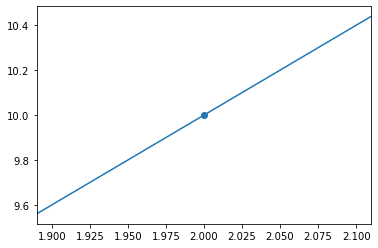

In [110]:
regression_plot(x, y, m, b)

In [111]:
b.item()

2.039999008178711

In [112]:
m.item()

3.97999906539917